In [1]:
import requests

In [2]:
data = requests.get("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/state.csv")
data

<Response [200]>

In [3]:
with open("Data/state.csv" , "wb") as f: 
    f.write(data.content)

In [4]:
import pandas as pd 
from scipy.stats import trim_mean

In [5]:
state  = pd.read_csv("Data/state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
print(state['Population'].mean())
print(trim_mean(state['Population'] ,0.1)) #omitting 10% of data
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


In [7]:
import numpy as np


In [8]:
print(np.average(state['Murder.Rate'] , weights=state['Population'])
)
#weigthed average

4.445833981123393


In [9]:
import wquantiles 
print(f"The weighted median of Murder rate with population as weight is {wquantiles.median(state['Murder.Rate'] , weights = state['Population'])}")

The weighted median of Murder rate with population as weight is 4.4


In [12]:
from statsmodels import robust
print(f"The Standard Deviation is {state['Population'].std()}")
print(f"IQR {state['Population'].quantile(.75) - state['Population'].quantile(.25)}")
print(f"Median Absolute Deviationis {robust.scale.mad(state['Population'])}")

The Standard Deviation is 6848235.347401142
IQR 4847308.0
Median Absolute Deviationis 3849876.1459979336


In [13]:
state['Murder.Rate'].quantile([0.05 , 0.25 , 0.5 , 0.75  , 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

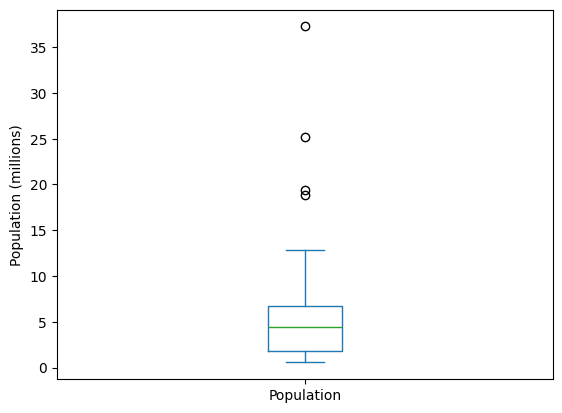

In [15]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel("Population (millions)")

In [18]:
binnedPopulation = pd.cut(state['Population'] , 10)
pd.DataFrame(binnedPopulation.value_counts())

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0.5, 0, 'Population (millions)')

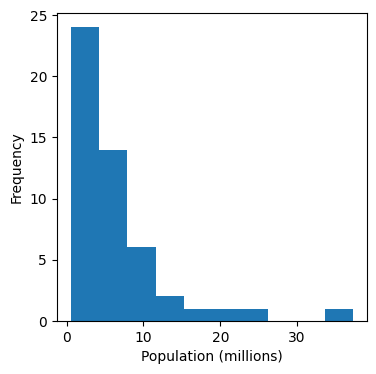

In [19]:
ax = (state['Population']/1_000_000).plot.hist(figsize =( 4 , 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

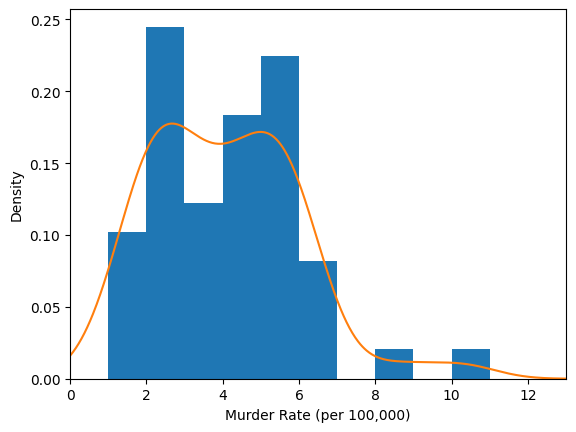

In [25]:
ax = state['Murder.Rate'].plot.hist(density = True , xlim = [0 ,13] , bins = range(1 , 12))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel("Murder Rate (per 100,000)")